In [452]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import pandas as pd
import seaborn as sns
import seaborn as sb 
 
#Import Data
world_2021 = pd.read_csv('../data/2021.csv')
world_df = pd.read_csv('../data/world_happiness.csv')
geo_temp = world_2021

#Renaming Column Names
world_df.rename(columns={'Country name': 'Country'}, inplace=True)
world_df.rename(columns={'Life Ladder': 'Score'}, inplace=True)
world_2021.rename(columns={'Country name': 'Country'}, inplace=True)


In [453]:
# Which countries were the happiest in 2021?
happiest_df = world_2021[['Country', 'Score']].head()
happiest_df


,Country,Score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [454]:
geo_temp

,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [455]:
# Which countries were the unhappiest 2021?
unhappiest_df = world_2021[['Country', 'Score']].tail()
unhappiest_df

,Country,Score
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


In [456]:
happiest_unhappiest_countries = world_2021[world_2021["Country"].isin([
                                                                'Finland', 
                                                                'Denmark',
                                                                'Switzerland',
                                                                'Iceland',
                                                                'Netherlands',
                                                                'Lesotho',
                                                                'Botswana',
                                                                'Rwanda',
                                                                'Zimbabwe',
                                                                'Afghanistan'
                                                                ])]

happiest_unhappiest_countries.sort_values(by='Score', ascending=False).set_index('Country')


,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [457]:
graphing_happies_unhappiest = happiest_unhappiest_countries[['Country', 'Score']]
# .set_index('Country name')
graphing_happies_unhappiest


,Country,Score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


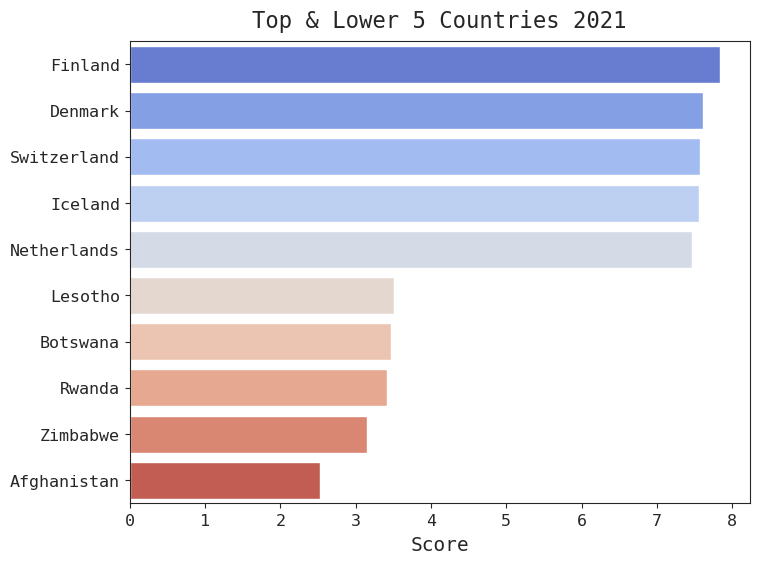

In [458]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Score', y='Country', data=graphing_happies_unhappiest, palette='coolwarm')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top & Lower 5 Countries 2021", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.savefig('../img/Top & Lower 5 Countries.png', bbox_inches = 'tight')
plt.show()




In [459]:
correlation_df = geo_temp[['Score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
correlation_df.corr()

,Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


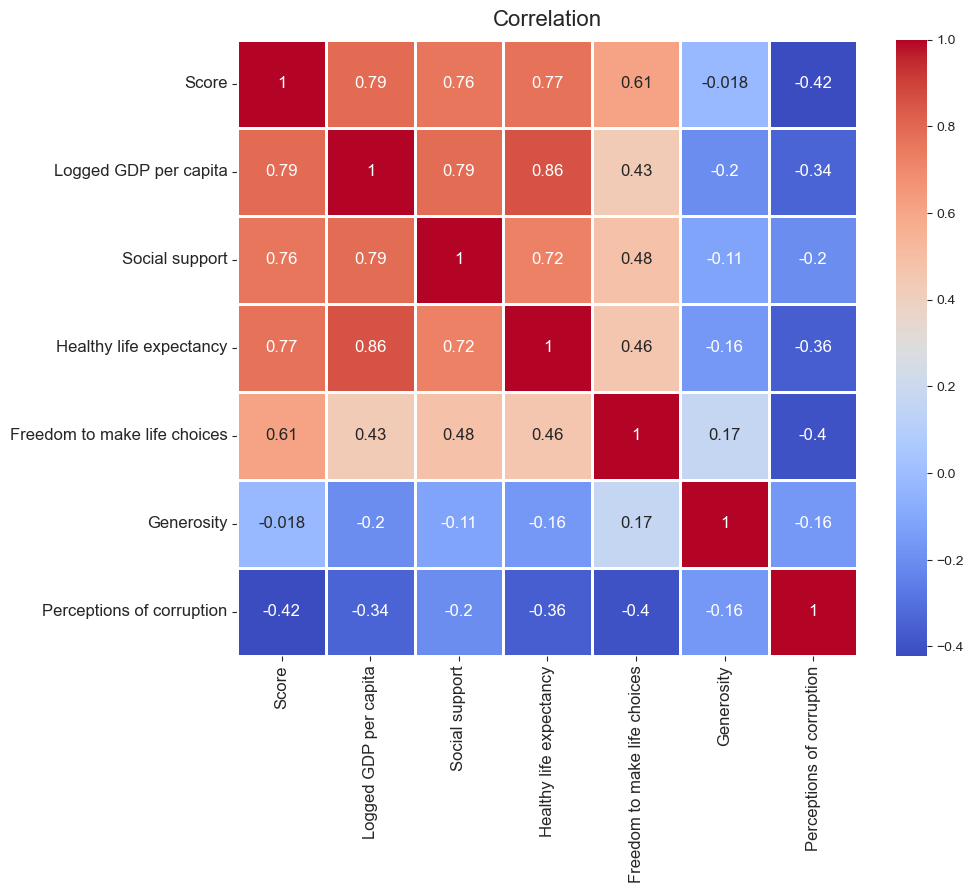

In [460]:
#Setting Figure Size & Color
plt.figure(figsize = (10,8))
cmap = sns.color_palette("coolwarm", as_cmap=True)

#Plotting
ax = sns.heatmap(correlation_df.corr(), cbar=True, annot=True, annot_kws={"size":12},
                                cmap=cmap, linewidths=1, linecolor='white')

plt.title('Correlation', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)
plt.savefig('../img/Correlation.png', bbox_inches = 'tight')
# Show the plot
plt.show()


In [461]:
#Does money buy happiness?
top_capita = geo_temp.sort_values(by='Logged GDP per capita', ascending=False).head(10)
top_capita



,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
18,United States,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,68.200,0.837,0.098,0.698,2.43,1.533,1.030,0.621,0.554,0.252,0.154,2.807
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [462]:
#Average of the country over 13 years
avg_countries = world_df.groupby(['Country']).mean().drop([
                                                'year', 
                                                'Positive affect', 
                                                'Negative affect', 
                                                'Generosity'], 
                                                axis=1)

avg_countries = avg_countries.reset_index()

In [463]:
avg_countries

,Country,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
0,Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.843333
1,Albania,5.019385,9.384385,0.716231,67.546154,0.662923,0.869385
2,Algeria,5.389875,9.328875,0.803571,65.290000,0.519167,0.691000
3,Angola,4.420250,8.990000,0.738250,53.550000,0.456250,0.866750
4,Argentina,6.310133,10.033800,0.904400,67.900000,0.768200,0.842067
...,...,...,...,...,...,...,...
161,Venezuela,6.019867,9.480083,0.910133,65.958667,0.666400,0.795200
162,Vietnam,5.305857,8.655286,0.829231,66.928571,0.882455,0.784700
163,Yemen,3.912250,8.102700,0.739833,54.866667,0.622417,0.824667
164,Zambia,4.551714,8.066857,0.737714,51.707143,0.756786,0.828857


In [464]:
top_avg_capita = avg_countries.sort_values(by='Log GDP per capita', ascending=False).head(10)
top_avg_capita

,Country,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
86,Luxembourg,7.047182,11.607091,0.920455,72.249091,0.907727,0.377182
121,Qatar,6.569200,11.507600,0.863000,67.188000,0.898000,0.184000
129,Singapore,6.504231,11.329000,0.880769,75.358462,0.843231,0.097833
143,Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.305900
67,Ireland,7.067714,11.064857,0.960000,71.722857,0.892500,0.465786
156,United Arab Emirates,6.800462,11.059692,0.862500,66.646154,0.916083,0.299000
111,Norway,7.512400,11.039100,0.950500,72.670000,0.954400,0.344200
77,Kuwait,6.273727,10.974818,0.873400,65.472727,0.815900,0.512250
158,United States,7.090200,10.956067,0.920571,68.440000,0.843333,0.688333
60,Hong Kong S.A.R. of China,5.447091,10.888700,0.834727,NaN,0.847273,0.348818


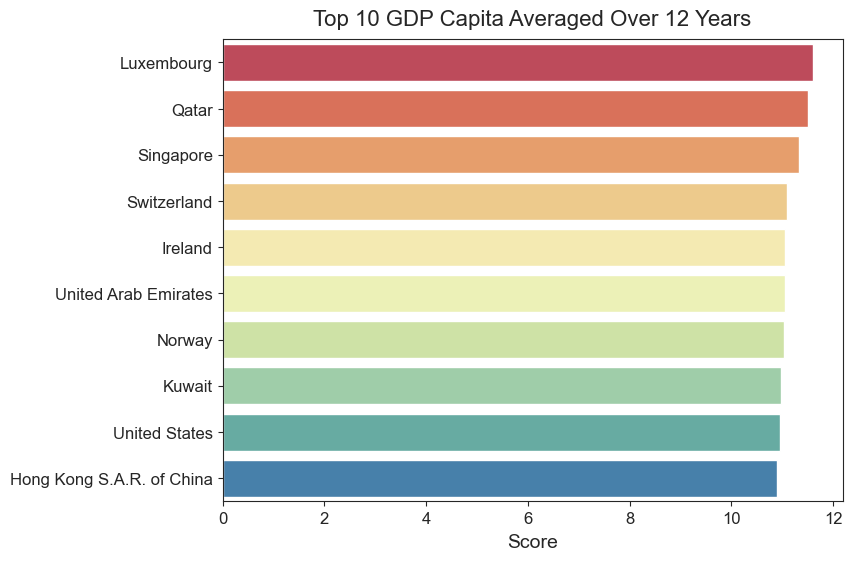

In [465]:

# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Log GDP per capita', y='Country', data=top_avg_capita, palette='Spectral')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 GDP Capita Averaged Over 12 Years", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.savefig('../img/Top 10 GDP capita.png', bbox_inches = 'tight')
plt.show()

In [466]:
#Does money buy happiness?
top_avg_social = avg_countries.sort_values(by='Social support', ascending=False).head(10)
top_avg_social


,Country,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
62,Iceland,7.446500,10.860625,0.977500,72.865000,0.931500,0.701000
36,Cuba,5.418000,NaN,0.970000,68.440000,0.281000,NaN
67,Ireland,7.067714,11.064857,0.960000,71.722857,0.892500,0.465786
39,Denmark,7.680400,10.879200,0.957133,71.169333,0.945067,0.200467
105,New Zealand,7.310286,10.583000,0.952929,72.428571,0.923143,0.266214
111,Norway,7.512400,11.039100,0.950500,72.670000,0.954400,0.344200
47,Finland,7.597154,10.749923,0.949000,71.180000,0.939692,0.249000
6,Australia,7.282071,10.755571,0.947357,72.692857,0.921714,0.415500
157,United Kingdom,6.917600,10.688467,0.945333,71.508000,0.851400,0.481133
143,Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.305900


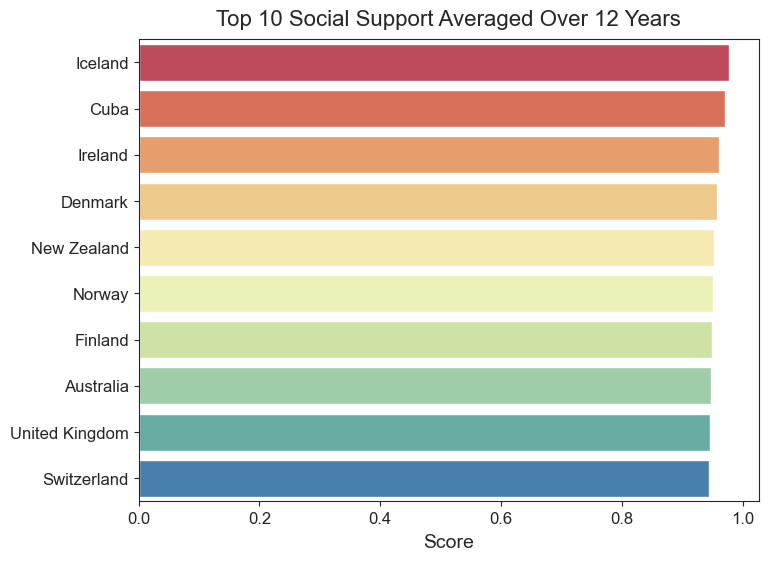

In [467]:

# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Social support', y='Country', data=top_avg_social, palette='Spectral')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 Social Support Averaged Over 12 Years", fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)
plt.savefig('../img/Top 10 Social Support.png', bbox_inches = 'tight')
plt.show()

In [468]:
Nato_countries = world_df[world_df["Country"].isin([
                                                                'Belgium', 
                                                                'Canada',
                                                                'Denmark',
                                                                'France',
                                                                'Germany',
                                                                'Hungary',
                                                                'Iceland',
                                                                'Italy',
                                                                'Netherlands',
                                                                'Poland',
                                                                'Romania',
                                                                'United States'
                                                                ])].groupby(['Country']).mean()

Nato_countries[['Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Perceptions of corruption']]


,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
Country,,,,
Belgium,0.920143,71.228571,0.853500,0.619143
Canada,0.935571,72.694667,0.927933,0.417867
Denmark,0.957133,71.169333,0.945067,0.200467
France,0.924133,72.789333,0.832933,0.633533
Germany,0.924200,71.310667,0.862067,0.583933
Hungary,0.903357,66.357143,0.615429,0.905857
Iceland,0.977500,72.865000,0.931500,0.701000
Italy,0.897667,72.974667,0.642533,0.907200
Netherlands,0.933500,71.707143,0.907429,0.414929


In [469]:
#graph
world_2021.describe()

,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [470]:
world_2021

,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [471]:
Afghanistan_df = world_df.loc[(world_df["Country"] == "Afghanistan")]
Afghanistan_df



,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [472]:
# #counts the number of results in each column
# for column in world_df.columns:
#      print("\n" + column)
#      print(world_df[column].value_counts())

In [473]:

Adversaries_df = world_df[world_df["Country"].isin(['China', 'Russia'])]
Adversaries_df

,Country,year,Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
342,China,2006,4.560,8.696,0.747,66.88,NaN,NaN,NaN,0.809,0.170
343,China,2007,4.863,8.824,0.811,67.06,NaN,-0.176,NaN,0.817,0.159
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN,0.817,0.147
345,China,2009,4.454,8.996,0.798,67.42,0.771,-0.160,NaN,0.786,0.162
346,China,2010,4.653,9.092,0.768,67.60,0.805,-0.133,NaN,0.765,0.158
347,China,2011,5.037,9.179,0.787,67.76,0.824,-0.186,NaN,0.820,0.134
348,China,2012,5.095,9.249,0.788,67.92,0.808,-0.185,NaN,0.821,0.159
349,China,2013,5.241,9.319,0.778,68.08,0.805,-0.158,NaN,0.836,0.142
350,China,2014,5.196,9.386,0.820,68.24,NaN,-0.217,NaN,0.854,0.112
351,China,2015,5.304,9.449,0.794,68.40,NaN,-0.244,NaN,0.809,0.171


In [474]:
#Nato Countries
world_2021 = world_df.loc[(world_df['year']>2008)]
world_2021 = pd.pivot_table(world_2021, values='Score', index=['year'], columns=['Country'])

safety = world_2021.copy()

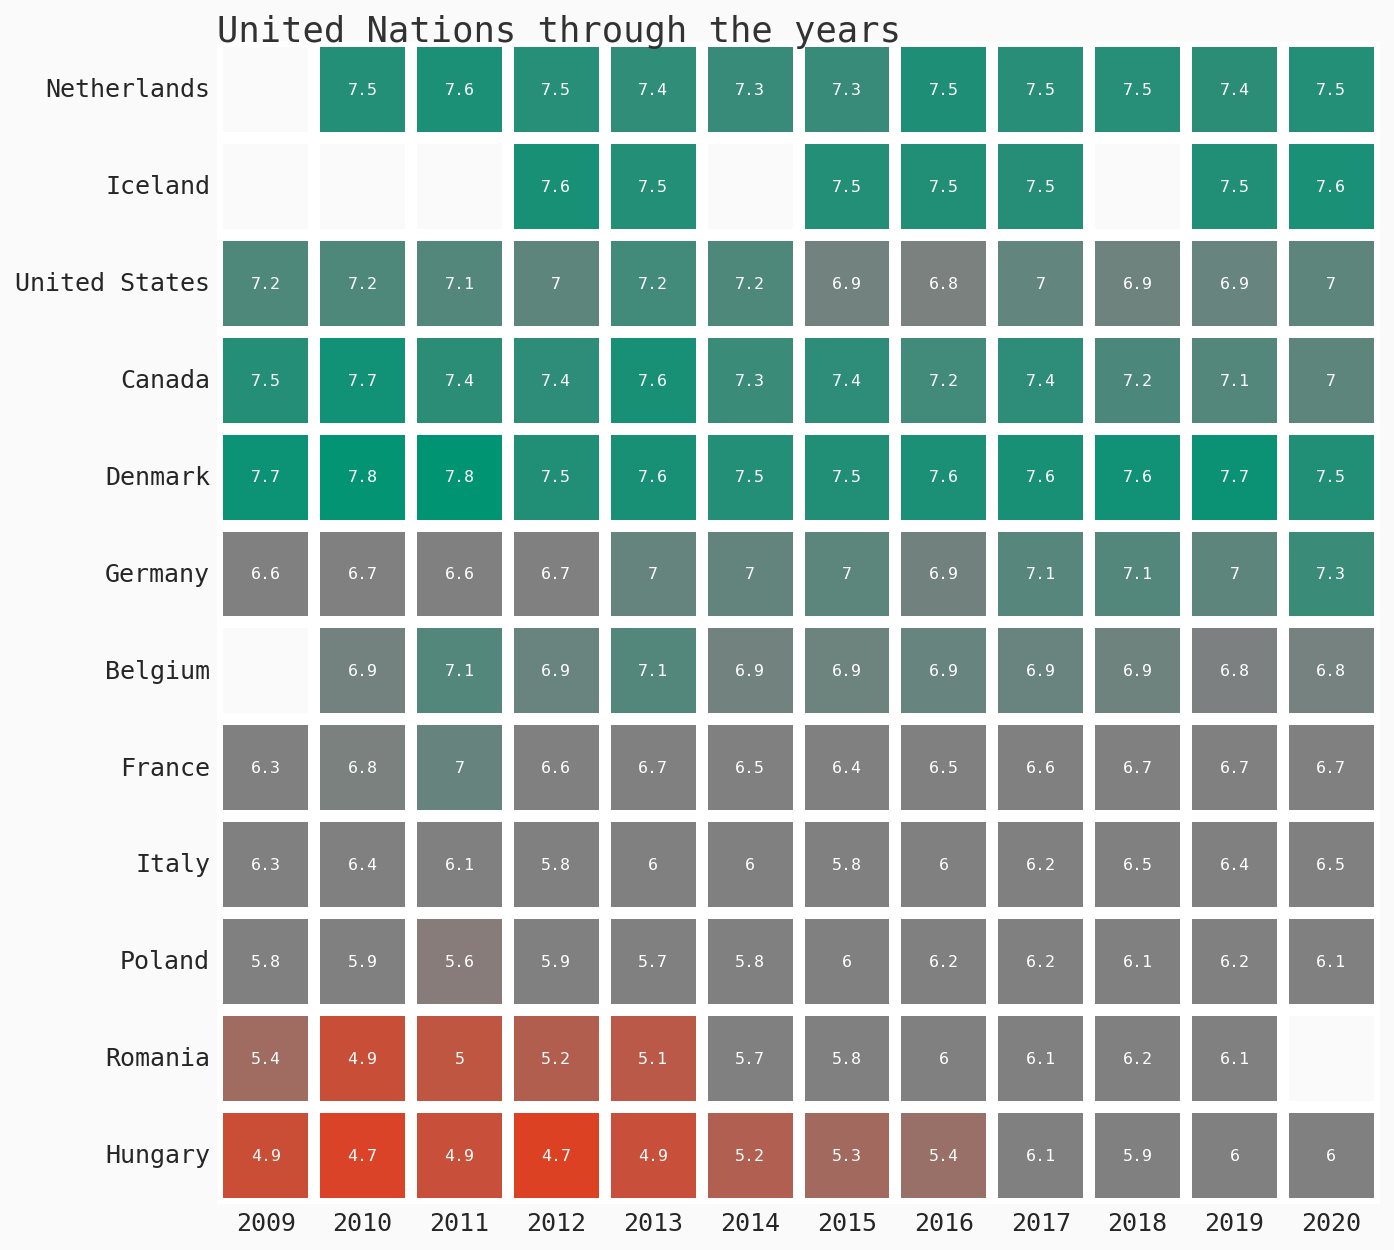

In [475]:
background_color = "#fafafa"
low_c = '#dd4124'
high_c = '#009473'
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150, facecolor=background_color)
ax.set_facecolor(background_color) 

plt.rcParams["font.family"] = "monospace"

colors = [low_c,'gray','gray',high_c]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

list_of_contries = ['Netherlands','Iceland','United States','Canada','Denmark','Germany','Belgium','France','Italy','Poland','Romania','Hungary']
series_of_contries = pd.Series(list_of_contries)

sns.heatmap(world_2021[list_of_contries].T, 
            square=True,
            linewidth=5, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True,annot_kws={"size": 8})

ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,.00,'United Nations through the years',fontweight='normal',fontsize=17,color='#323232')

plt.savefig('../img/United Nations through the years', bbox_inches = 'tight')
plt.show()

In [476]:
happiness_mean = geo_temp['Score'].mean()
geo_temp['lower_happy'] = geo_temp['Score'].apply(lambda x: 0 if x < happiness_mean else 1)


In [477]:
# Source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

import matplotlib.colors
import geopandas
import pycountry

# Appending column "CODE" to reflect the Countries abbreviation. 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE


# Creating the column
geo_temp['CODE']=alpha3code(geo_temp.Country)
geo_temp.head()


,Country,Regional indicator,Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,lower_happy,CODE
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,1,FIN
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,1,DNK
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,1,CHE
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,1,ISL
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,1,NLD


In [478]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,geo_temp,on='CODE')

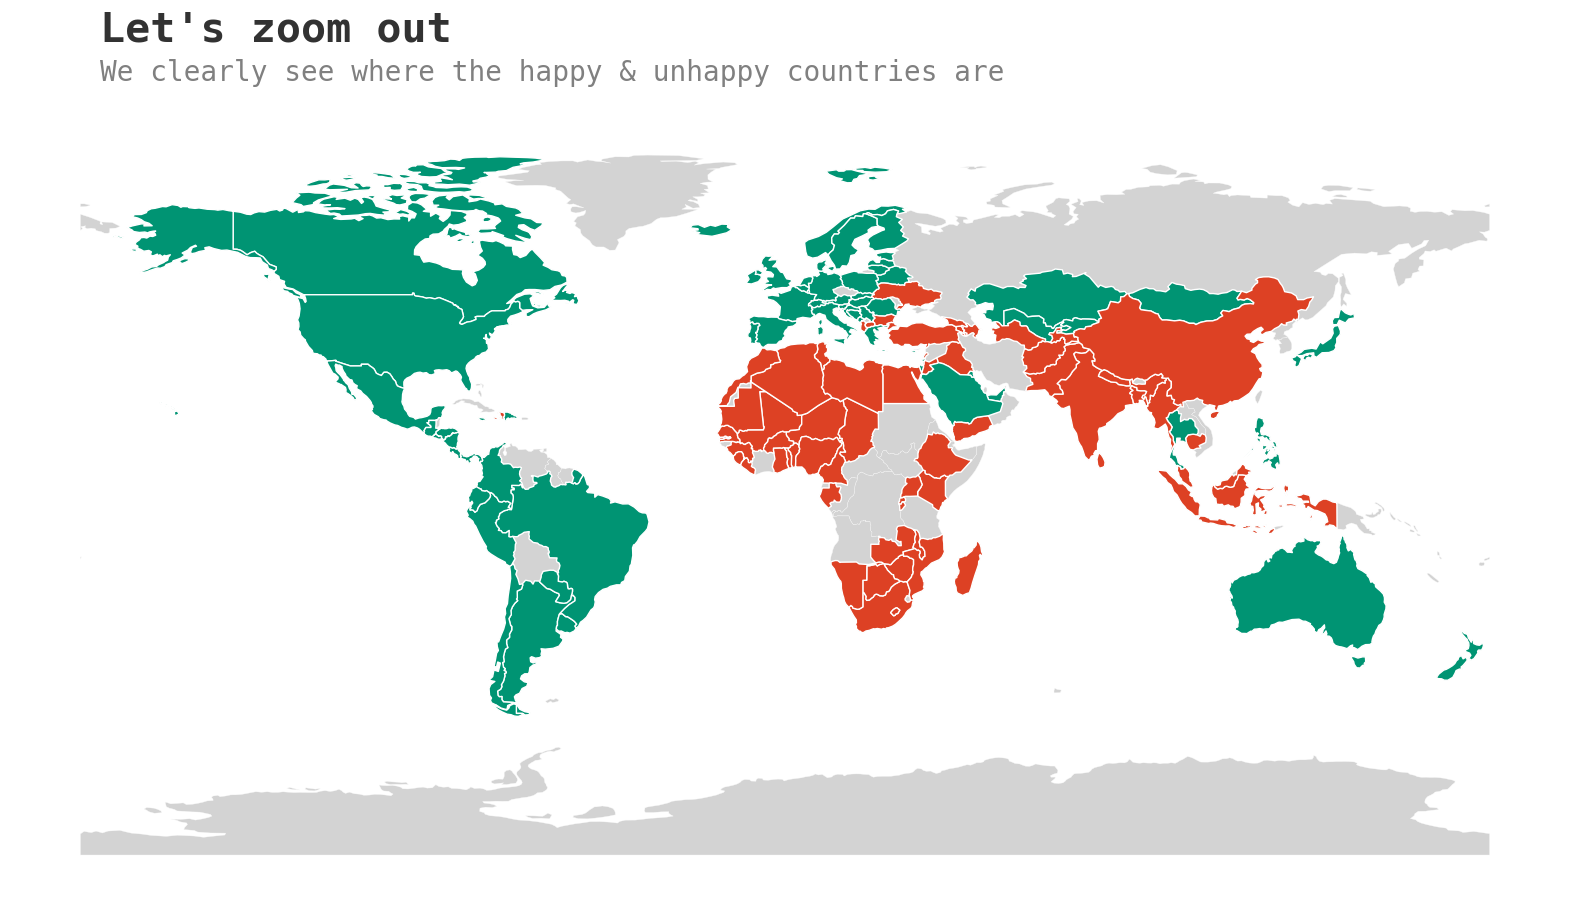

In [479]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [low_c,high_c])

ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color='lightgray')
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='lower_happy',figsize=(20, 15),legend=False,cmap=cmap,ax=ax)


ax.text(-175,112,"Let's zoom out",fontsize=30,fontweight='bold',color='#323232')
ax.text(-175,102,'We clearly see where the happy & unhappy countries are',color='gray',fontfamily='monospace',fontsize=20)
plt.savefig('../img/Geopandas.png', bbox_inches = 'tight')
plt.show()